# (Ford Gobike)
## by (Mohammed maher)

## Investigation Overview

> i want to get some information on what affect the trips based on age, gender,user type and trip duration

## Dataset Overview

> the dataset consist of 174749 row data with 17 coulmens (start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_min,bike_id,user_type,member_birth_year,bike_share_for_all_trip,age)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('fordgobike-tripdata.csv')
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')

df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_day_of_week'] = df['start_day_of_week'].astype(weekdaycat)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (User Types and average trip duration)

> Customers only represent 9.3% from all the users however, the highest average trip duration done by them on average 16 minutes per trip on the other hand Subscribers represent 90.7% and their average trip duration about 10 minutes.

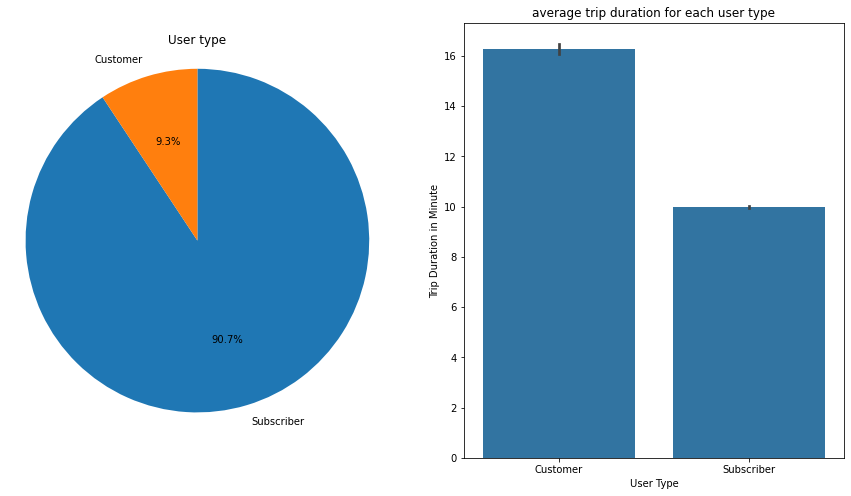

In [12]:
plt.figure(figsize=(15,8))
base_color = sb.color_palette()[0]
plt.subplot(1,2,1)
sorted_typ = df['user_type'].value_counts()
plt.pie(sorted_typ, labels=sorted_typ.index, startangle=90, counterclock=False, autopct='%1.1f%%' );
plt.axis('square');
plt.title("User type");
plt.subplot(1,2,2)
sb.barplot(data=df,  x='user_type', y='duration_min', color=base_color)
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');
plt.title("average trip duration for each user type");

## (trip duration based on users gender)

> males represent 74.6% and females 23.3% and females have slight more average trip duration than males 

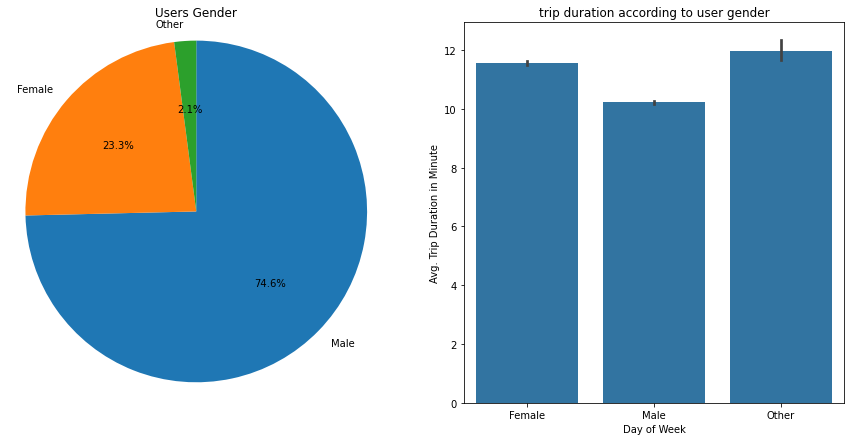

In [10]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sorted_gen = df['member_gender'].value_counts()
plt.pie(sorted_gen, labels=sorted_gen.index, startangle=90, counterclock=False, autopct='%1.1f%%' );
plt.axis('square');
plt.title("Users Gender ");
plt.subplot(1,2,2)
sb.barplot(data=df, x='member_gender', y='duration_min', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.title("trip duration according to user gender");

## (trip duration based on age)

>most frequent users aged between 20 and 45. As remark, duration is registered by younger members.

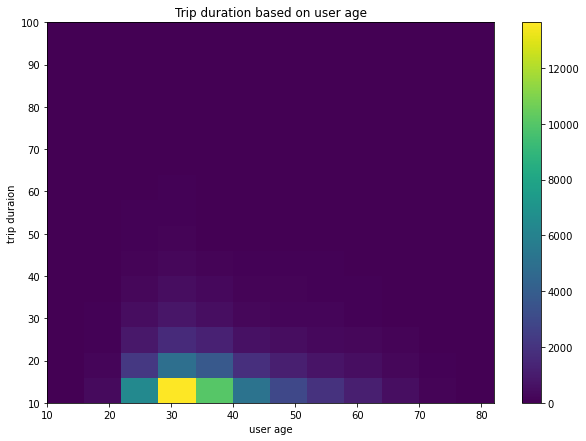

In [11]:
plt.figure(figsize=(10,7))
bins_x = np.arange(10, 80+5, 6)
bins_y = np.arange(10, 100+5, 6)

plt.hist2d(( df['age']), df['duration_min'],bins = [bins_x, bins_y])
plt.xlabel("user age")
plt.ylabel("trip duraion")
plt.title("Trip duration based on user age")
plt.colorbar()
plt.show()


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!